
# Dataset 

### File descriptions

train.csv - the training set


test.csv - the test set


data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here


sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

### Data fields

Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale
 

# Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit as sigmoid

# Loading the Dataset

In [2]:
# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Cleaning

In [4]:
#checking for null values
train_data.isnull().values.any()#checking for nan values

True

In [5]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
train_data = train_data.fillna(0)#replacing all Nan Values

In [7]:
train_data.isnull().values.any()

False

In [8]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Checking for Duplicates

In [9]:
#Removing Duplicate rows and missing values
duplicate_rows = train_data[train_data.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])

No. of duplicate rows:  0


# Data Correlation

<AxesSubplot:>

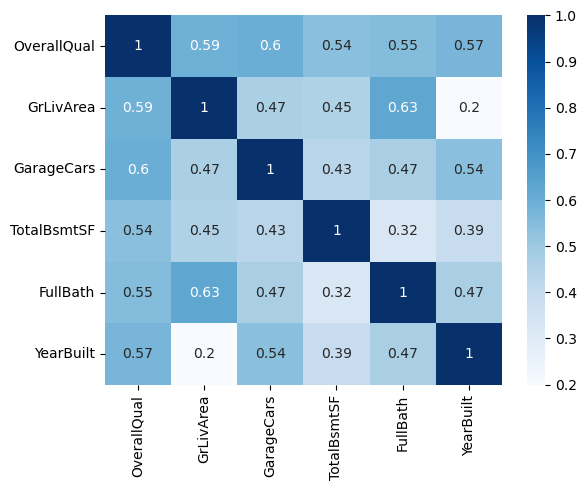

In [10]:
#checking correlation between features
correl= train_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']].corr()
sns.heatmap(correl,annot=True,cmap='Blues')

In [11]:
# Encode the target variable
threshold = train_data['SalePrice'].mean()  # Example threshold
train_data['SalePrice'] = (train_data['SalePrice'] > threshold).astype(int)

# Data Preprocessing

In [12]:
# Select relevant features and preprocess
X = train_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
y = train_data['SalePrice']

In [13]:
# Standardize numerical features
X = (X - X.mean()) / X.std()

In [14]:
# Add bias term to X
X['bias'] = 1

In [15]:
# Convert data to arrays
X = X.values
y = y.values.reshape(-1, 1)

In [16]:
# Initialize weights
np.random.seed(0)
W = np.random.randn(X.shape[1], 1)

# ReLU and tanh functions

In [17]:
# Define ReLU and tanh activation functions
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

In [18]:
# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Log Loss Function

In [19]:
# Define log loss function
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.maximum(epsilon, np.minimum(1 - epsilon, y_pred))
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Stochastic Gradient Descent (SGD) Implementation

In [21]:
# Define stochastic gradient descent (SGD) function
def sgd(X, y, W, learning_rate, activation):
    if activation == 'sigmoid':
        y_pred = sigmoid(X.dot(W))
    elif activation == 'relu':
        y_pred = relu(X.dot(W))
    elif activation == 'tanh':
        y_pred = tanh(X.dot(W))
    
    loss = log_loss(y, y_pred)
    gradient = X.T.dot(y_pred - y) / len(y)
    W -= learning_rate * gradient
    return W, loss

# Logistic Regression Implementation

In [31]:
# Train the model
learning_rate = 0.01
epochs = 1000
losses_sigmoid = []
losses_relu = []
losses_tanh = []

In [32]:
for epoch in range(epochs):
    # Train with sigmoid activation
    W, loss_sigmoid = sgd(X, y, W, learning_rate, 'sigmoid')
    losses_sigmoid.append(loss_sigmoid)
    
    # Train with ReLU activation
    W, loss_relu = sgd(X, y, W, learning_rate, 'relu')
    losses_relu.append(loss_relu)

    # Train with tanh activation
    W, loss_tanh = sgd(X, y, W, learning_rate, 'tanh')
    losses_tanh.append(loss_tanh)

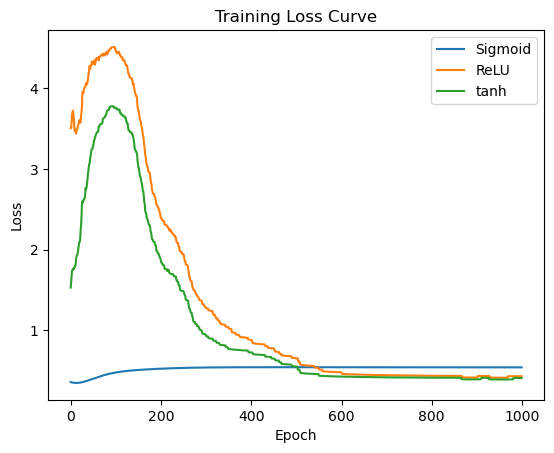

In [33]:
# Plot the loss curves for all activations
plt.plot(losses_sigmoid, label='Sigmoid')
plt.plot(losses_relu, label='ReLU')
plt.plot(losses_tanh, label='tanh')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

In [36]:
# Make predictions using all activations
def predict(X, W, activation):
    if activation == 'sigmoid':
        return (sigmoid(X.dot(W)) > 0.5).astype(int)
    elif activation == 'relu':
        return (relu(X.dot(W)) > 0.5).astype(int)
    elif activation == 'tanh':
        return (tanh(X.dot(W)) > 0.5).astype(int)
    
y_pred_sigmoid = predict(X, W, 'sigmoid')
y_pred_relu = predict(X, W, 'relu')
y_pred_tanh = predict(X, W, 'tanh')

# Accuracy

In [37]:
# Define functions for accuracy and F1 score calculation
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# F-1 Score

In [38]:
def f1_score(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1

In [39]:
# Calculate accuracy and F1 score for ReLU model
acc_relu = accuracy(y.flatten(), y_pred_relu.flatten())
f1_relu = f1_score(y.flatten(), y_pred_relu.flatten())

In [40]:

# Calculate accuracy and F1 score for tanh model
acc_tanh = accuracy(y.flatten(), y_pred_tanh.flatten())
f1_tanh = f1_score(y.flatten(), y_pred_tanh.flatten())

In [41]:
# Calculate accuracy and F1 score for sigmoid model
acc_sigmoid = accuracy(y.flatten(), y_pred_sigmoid.flatten())
f1_sigmoid = f1_score(y.flatten(), y_pred_sigmoid.flatten())

print(f'Accuracy with Sigmoid: {acc_sigmoid}')
print(f'F1 Score with Sigmoid: {f1_sigmoid}')

Accuracy with Sigmoid: 0.7821917808219178
F1 Score with Sigmoid: 0.7773109243697479


In [42]:
print(f'Accuracy with ReLU: {acc_relu}')
print(f'F1 Score with ReLU: {f1_relu}')


Accuracy with ReLU: 0.8952054794520548
F1 Score with ReLU: 0.8607825295723385


In [43]:

print(f'Accuracy with tanh: {acc_tanh}')
print(f'F1 Score with tanh: {f1_tanh}')

Accuracy with tanh: 0.8917808219178082
F1 Score with tanh: 0.8526119402985075


# Testing on Test Data

In [44]:
# Preprocess test data
X_test = test_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
X_test = (X_test - X_test.mean()) / X_test.std()
X_test['bias'] = 1
X_test = X_test.values

# Make predictions on test data
y_test_pred_relu = predict(X_test, W, 'relu')
y_test_pred_tanh = predict(X_test, W, 'tanh')

# Load the true labels for the test data (if available)
# For this example, let's assume the true labels are not available and are replaced with a random array
y_test = np.random.randint(0, 2, size=len(X_test)).reshape(-1, 1)

# Calculate accuracy and F1 score for ReLU model on test data
acc_test_relu = accuracy(y_test.flatten(), y_test_pred_relu.flatten())
f1_test_relu = f1_score(y_test.flatten(), y_test_pred_relu.flatten())

# Calculate accuracy and F1 score for tanh model on test data
acc_test_tanh = accuracy(y_test.flatten(), y_test_pred_tanh.flatten())
f1_test_tanh = f1_score(y_test.flatten(), y_test_pred_tanh.flatten())

print(f'Test Accuracy with ReLU: {acc_test_relu}')
print(f'Test F1 Score with ReLU: {f1_test_relu}')

print(f'Test Accuracy with tanh: {acc_test_tanh}')
print(f'Test F1 Score with tanh: {f1_test_tanh}')


Test Accuracy with ReLU: 0.5147361206305688
Test F1 Score with ReLU: 0.44164037854889593
Test Accuracy with tanh: 0.5058259081562714
Test F1 Score with tanh: 0.4123879380603097


# Conclusion:

Sucessfully implemented logistic regression from scratch with key components such as Log Loss function with backward and forward propogation, SGD, replacing sigmoid function with ReLU and tanh. The model was applied to housing prices dataset achieving evaluation metrics of accuracy and F-1 score and demonstarting comprehensive understanding of Logistic regression implementation.
